In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\carno\Desktop\risco_credito.csv")
display(df)

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [3]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [4]:
X

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [5]:
y

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()
X[:,0] = label_encoder.fit_transform(X[:,0])
X[:,1] = label_encoder.fit_transform(X[:,1])
X[:,2] = label_encoder.fit_transform(X[:,2])
X[:,3] = label_encoder.fit_transform(X[:,3])

In [8]:
X

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [9]:
y

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
risk_decision_tree = DecisionTreeClassifier(criterion = 'entropy')
risk_decision_tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
risk_decision_tree.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.5555555555555556, 0.9166666666666666, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.3333333333333333, 0.75, 'historia <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.2222222222222222, 0.5833333333333334, 'renda <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.3333333333333333, 0.4166666666666667, 'historia <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = moderado'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4444444444444444, 0.25, 'divida <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.5555555555555556, 0.08333333333333333, 'entropy = 0.0\nsample

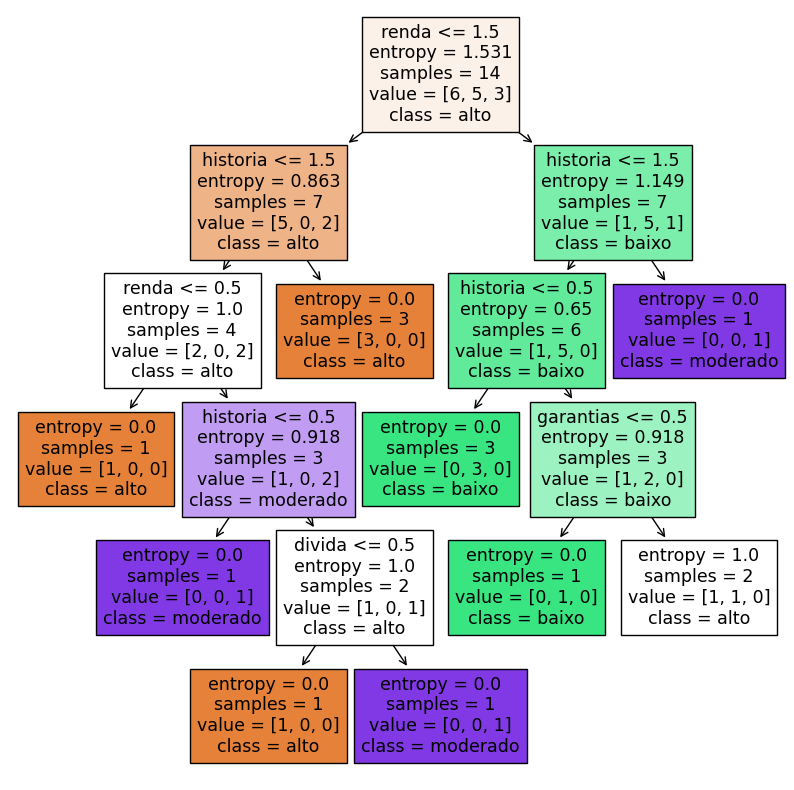

In [20]:
predictors = ['historia','divida','garantias','renda']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(risk_decision_tree, feature_names = predictors, class_names = risk_decision_tree.classes_, filled=True)